<a href="https://colab.research.google.com/github/Buy-me-some-str/practice/blob/main/%D0%A2%D0%98%D0%90%D0%91%D0%9B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble

warnings.filterwarnings('ignore')

## Bagging

In [2]:
def f(x):
    return 6 - 6*x - x**2 - 7*x**3

In [3]:
x_datasets = []
y_datasets = []

for i in range(10):
    xx = np.random.uniform(-10, 10, 50)
    x_datasets.append(xx)
    y_datasets.append([f(i) for i in xx]+np.random.uniform(-1000, 1000, 50))

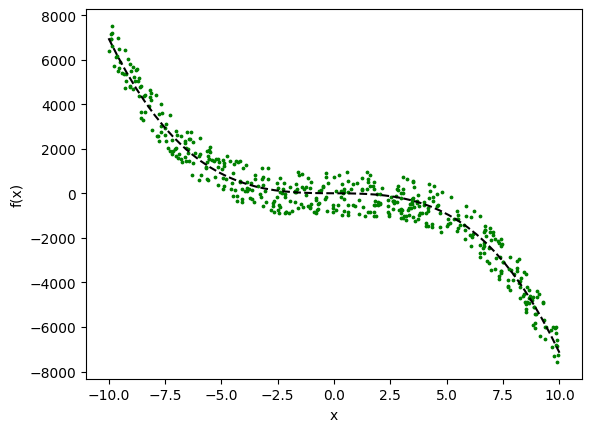

In [4]:
x = np.linspace(-10, 10, 50)
y = f(x)
plt.xlabel('x')
plt.ylabel('f(x)')
for i in range(10):
    plt.scatter(x_datasets[i], y_datasets[i], c = 'green', s=3)
plt.plot(x, y, '--', c='black')
plt.show()

In [5]:
models = []
for i in range(10):
    model_tree = tree.DecisionTreeRegressor(max_depth=8, random_state=42)
    model_tree.fit(x_datasets[i].reshape(-1, 1), y_datasets[i])
    models.append(model_tree)

In [6]:
models

[DecisionTreeRegressor(max_depth=8, random_state=42),
 DecisionTreeRegressor(max_depth=8, random_state=42),
 DecisionTreeRegressor(max_depth=8, random_state=42),
 DecisionTreeRegressor(max_depth=8, random_state=42),
 DecisionTreeRegressor(max_depth=8, random_state=42),
 DecisionTreeRegressor(max_depth=8, random_state=42),
 DecisionTreeRegressor(max_depth=8, random_state=42),
 DecisionTreeRegressor(max_depth=8, random_state=42),
 DecisionTreeRegressor(max_depth=8, random_state=42),
 DecisionTreeRegressor(max_depth=8, random_state=42)]

In [7]:
y_pred = []
for i in range(10):
    y_pred.append(models[i].predict(x.reshape(-1, 1)))

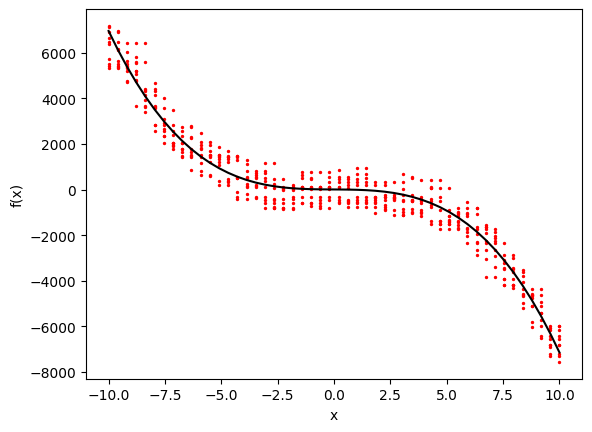

In [8]:
plt.xlabel('x')
plt.ylabel('f(x)')

for i in range(10):
    plt.scatter(x, y_pred[i], c='red', s=2)
plt.plot(x, y, color='black')
plt.show()

In [9]:
mean_pred = np.array(y_pred).mean(axis=0)
mean_pred

array([ 6.27471685e+03,  5.99447008e+03,  5.44542685e+03,  5.21181303e+03,
        4.39766622e+03,  3.67522257e+03,  2.84855135e+03,  2.30629599e+03,
        1.98823414e+03,  1.88793236e+03,  1.57517136e+03,  1.41757620e+03,
        1.20651808e+03,  9.95483057e+02,  6.34466667e+02,  4.20219932e+02,
        3.05880996e+02,  1.53297238e+02, -1.94779294e+02, -2.84188443e+02,
       -2.57600888e+02,  8.04047779e+01, -2.28092488e+01, -1.74346054e+02,
        4.00129079e+01,  4.81788773e+01, -1.22249283e+02, -2.57773804e+00,
       -5.58523083e-01, -3.83406409e+02, -3.96585621e+02, -4.18550855e+02,
       -4.19526754e+02, -3.93971034e+02, -5.95134456e+02, -4.56729210e+02,
       -8.75239823e+02, -1.20076594e+03, -1.28163437e+03, -1.42969524e+03,
       -1.81966405e+03, -2.25958503e+03, -2.52476141e+03, -3.45737791e+03,
       -3.71920304e+03, -4.34252970e+03, -4.97698209e+03, -5.45049117e+03,
       -6.63004944e+03, -6.68726115e+03])

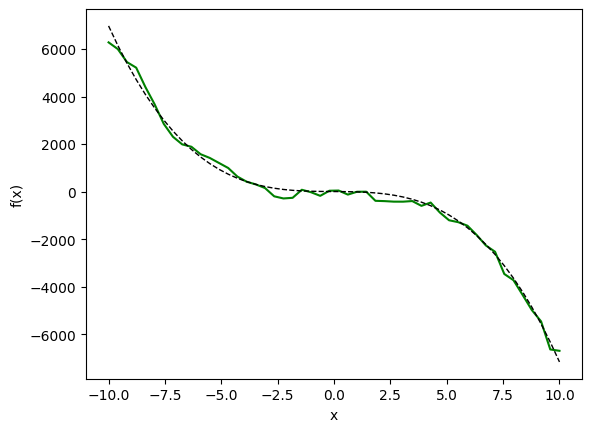

In [10]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, mean_pred, c='green', zorder=2)
plt.plot(x, y, '--', color='black', lw=1)
plt.show()

In [11]:
model_tree = tree.DecisionTreeRegressor(max_depth=8, random_state=1)
one_model = model_tree.fit(np.array(x_datasets).reshape(-1, 1), np.array(y_datasets).reshape(-1, 1))

In [12]:
one_pred = one_model.predict(x.reshape(-1, 1))

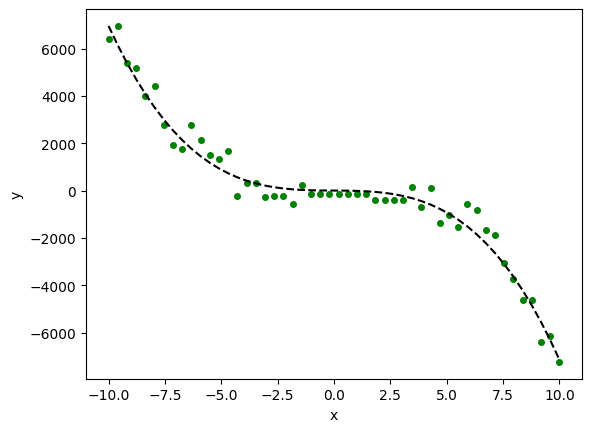

In [13]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, one_pred, c='green', s = 16, zorder=2)
plt.plot(x, y, '--', color='black', lw=1.5)
plt.show()

In [14]:
from sklearn.metrics import r2_score

print(f'R2 для случанйого леса {r2_score(mean_pred, f(x))}')
print(f'R2 для одного дерева решений', r2_score(one_pred, f(x)))

R2 для случанйого леса 0.9936608390177819
R2 для одного дерева решений 0.971392258579619


## Boosting

In [15]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [16]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
import catboost as cb

In [17]:
data = fetch_covtype()

In [18]:
predicts = data.data
target = data.target

In [19]:
A_train, A_test, y_train, y_test = train_test_split(predicts, target, train_size=0.8)

In [ ]:
random_forest = RandomForestClassifier(max_depth=15, min_samples_split=10).fit(A_train, y_train)

In [20]:
y_preds_d = random_forest.predict(A_train)
y_pred = random_forest.predict(A_test)
f1_score(y_preds_d, y_train, average='macro')

print("F1 мера для тренировочной выборки", f1_score(y_preds_d, y_train, average='macro'))
print('F1 мера для тестовой выборки',f1_score(y_pred, y_test, average='macro'))


NameError: ignored

In [ ]:
random_forest = RandomForestClassifier()
params_grid = {
    'max_depth': [12, 15, 18],
    'min_samples_leaf': [3, 7, 10],
    'min_samples_split': [6, 9, 12]
}

grid_search_random_forest = GridSearchCV(estimator=random_forest,
                                         param_grid=params_grid,
                                         scoring='f1_macro',
                                         cv=4)

In [ ]:
grid_search_random_forest.fit(A_train, y_train)

In [ ]:
best_model = grid_search_random_forest.best_estimator_

In [ ]:
best_model = grid_search_random_forest.best_estimator_

In [ ]:
y_preds_d = best_model.predict(A_train)
y_pred = best_model.predict(A_test)

print("F1 мера для тренировочной выборки", f1_score(y_preds_d, y_train, average='macro'))
print('F1 мера для тестовой выборки',f1_score(y_pred, y_test, average='macro'))

In [ ]:
model_catboost_clf = cb.CatBoostClassifier(iterations=3000,
                                           task_type='GPU',
                                           devices='0')
model_catboost_clf.fit(A_train, y_train)

In [ ]:
y_preds_t = model_catboost_clf.predict(A_train, task_type = "CPU")
y_preds = model_catboost_clf.predict(A_test, task_type = "CPU")

print("F1 мера для тренировочной выборки", f1_score(y_preds_t, y_train, average='macro'))
print('F1 мера для тестовой выборки',f1_score(y_preds, y_test, average='macro'))

In [21]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/classified_data.csv')
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = df.drop('TARGET CLASS', axis=1).columns)

In [22]:
target_data = df["TARGET CLASS"]
X_data = scaled_data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    target_data,
                                                    test_size=0.2,
                                                    shuffle=True)

In [44]:
X_train

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
831,1.148350,-0.076483,-0.530940,-1.059304,0.673999,-1.281546,-2.109553,1.183736,-0.123476,0.849263,-0.474303
310,-0.656448,-0.020225,-1.402897,0.866935,1.242105,-1.016499,1.212589,-1.993528,-1.100645,1.739390,-1.238836
294,-0.711873,-0.450204,-1.542320,-0.518059,-1.428406,0.221326,-1.119115,-0.823082,-0.930985,0.280257,-3.230405
76,-1.467048,-1.263105,0.991676,1.265033,1.119761,-0.421155,1.910948,2.749402,-0.580118,-0.704439,-1.649442
771,0.940504,0.853299,-1.168595,0.065118,-1.183686,-0.752809,0.796667,-0.920458,-0.864648,1.463918,-0.556843
...,...,...,...,...,...,...,...,...,...,...,...
308,-0.663376,0.117425,0.056668,-0.583699,0.981420,-2.092952,-0.590935,-0.743212,-1.740338,1.308486,-0.574184
967,1.619468,-0.181700,-1.290312,-1.727188,-0.412675,0.144008,-0.445479,-0.431718,-0.188345,0.103574,0.588354
633,0.462458,1.345556,-2.270727,-0.782747,0.459452,1.124084,-1.533512,1.560694,-0.690921,-0.280620,-1.144354
381,-0.410496,1.320366,1.139506,-0.019397,0.488969,-0.025220,1.798547,1.694740,0.547455,-0.354248,0.797495


In [54]:
print(len(X_train))

from time import time

800


In [57]:
t1_start = time()
models = []
n_estimators = 20

for i in range(n_estimators):
    indexes = np.random.choice(len(X_train), len(X_train), replace=True)
    X_sampled = X_train.values[indexes]
    y_sampled = y_train.values[indexes]
    classifier =  tree.DecisionTreeClassifier(max_depth=8, random_state=42)
    classifier.fit(X_sampled, y_sampled)
    models.append(classifier)
y_preds_d = []
y_preds = []
for i in range(len(models)):
    y_preds_d.append(models[i].predict(X_train))
    y_preds.append(models[i].predict(X_test))
t1_end = time()

majority_votes_train = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_preds_d)
majority_votes_test = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_preds)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(majority_votes_train, y_train)
test_acc = accuracy_score(majority_votes_test, y_test)

In [58]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")
print(f"Time: {t1_end - t1_start}")

Train accuracy: 0.9975
Test accuracy: 0.915
Time: 0.25564026832580566


In [59]:
t2_start = time()
model_catboost_clf = cb.CatBoostClassifier(iterations=3000,
                                           task_type='CPU',
                                           devices='0')
model_catboost_clf.fit(X_train, y_train)
t2_end = time()

Learning rate set to 0.00342
0:	learn: 0.6889610	total: 13.6ms	remaining: 40.8s
1:	learn: 0.6840591	total: 22.6ms	remaining: 33.9s
2:	learn: 0.6795364	total: 32.4ms	remaining: 32.4s
3:	learn: 0.6746423	total: 40.7ms	remaining: 30.5s
4:	learn: 0.6702841	total: 49.8ms	remaining: 29.8s
5:	learn: 0.6657207	total: 60.7ms	remaining: 30.3s
6:	learn: 0.6618613	total: 68.5ms	remaining: 29.3s
7:	learn: 0.6570221	total: 77.5ms	remaining: 29s
8:	learn: 0.6534439	total: 86.3ms	remaining: 28.7s
9:	learn: 0.6489330	total: 95.3ms	remaining: 28.5s
10:	learn: 0.6446731	total: 106ms	remaining: 28.9s
11:	learn: 0.6402969	total: 116ms	remaining: 28.8s
12:	learn: 0.6360690	total: 124ms	remaining: 28.6s
13:	learn: 0.6319237	total: 133ms	remaining: 28.4s
14:	learn: 0.6282204	total: 142ms	remaining: 28.2s
15:	learn: 0.6241874	total: 151ms	remaining: 28.1s
16:	learn: 0.6208581	total: 160ms	remaining: 28s
17:	learn: 0.6169681	total: 164ms	remaining: 27.1s
18:	learn: 0.6129987	total: 168ms	remaining: 26.4s
19:	le

In [60]:
y_preds_t =  model_catboost_clf.predict(X_train)
y_preds =  model_catboost_clf.predict(X_test)

train_acc2 = accuracy_score(y_preds_t, y_train)
test_acc2 = accuracy_score(y_preds, y_test)

In [61]:
print(f"Train accuracy: {train_acc2}")
print(f"Test accuracy: {test_acc2}")
print(f"Time: {t2_end-t2_start}")

Train accuracy: 1.0
Test accuracy: 0.915
Time: 30.278501510620117
